### 15. Manipulating image frequences for image filtration 

- 주파수 도메인에서 이미지를 조작하는 방법이다

1. 필요한 모듈을 가져오고 이미지를 그레이 스케일로 읽고 float32타입으로 변환해준다

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255

2. 이산 푸리에 변환을 사용해 이미지를 공간 도메인에서 주파수 도메인으로 변환한다

In [39]:
fft = cv2.dft(img, flags = cv2.DFT_COMPLEX_OUTPUT)
print(fft.shape)
print(fft.dtype)

(512, 512, 2)
float32


3. 낮은 주파수가 배열의 중앙에 위치하도록 이산 푸리에 변환의 결과를 이동시킨다

In [40]:
fft_shift = np.fft.fftshift(fft, axes = [0,1])

4. 고주파의 진폭을 0 으로 설정하고, 나머지는 변경하지 않는다

In [41]:
sz = 25
mask = np.zeros(fft.shape, np.uint8)
mask[img.shape[0]//2 - sz:img.shape[0]//2 + sz,
    img.shape[1]//2 - sz: img.shape[1]//2 + sz, :] = 1
fft_shift *= mask

5. 이산 푸리에 변환의 결과를 다시 이동시킨다

In [42]:
fft = np.fft.ifftshift(fft_shift, axes = [0,1])

6. 역이산 푸리에 변환을 사용해 필터링된 이미지를 주파수 도메인에서 다시 공간 도메인으로 변환한다

In [43]:
filtered = cv2.idft(fft, flags = cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
print(filtered.shape)
print(filtered.dtype)

(512, 512)
float32


7. 원본 이미지와 필터링된 이미지를 시각화 한다

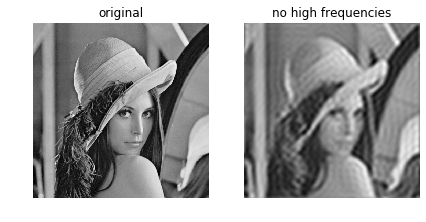

In [44]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('no high frequencies')
plt.imshow(filtered, cmap='gray')
plt.tight_layout(True)
plt.show()

In [45]:
cv2.imshow('filtered', filtered)
cv2.waitKey()
cv2.destroyAllWindows()

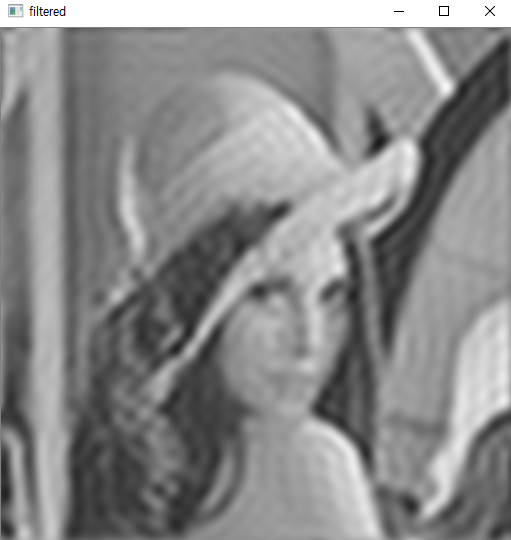

- 고속 푸리에 변환을 사용해 이미지를 공간 영역에서 주파수 영역으로 변환한다
- 그리고 정중앙을 제외한 모든 곳이 0 으로 설정된 마스크를 생성한다.
- 생성한 마스크를 사용해 고주파수의 진폭을 0으로 설정하고, 다시 이미지를 공간표현으로 변환한다